# Stroke classification 
This is a mlp neural network program which, based on previous data, will tell the user what risk from stroke them have. It determines this from inputs the user gives

**This is not for real world purposes - simply for a project**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
csv = pd.read_csv("C:\Adam\Coding\SciPy\classification\healthcare-dataset-stroke-data.csv")

In [3]:
csv.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Checking info of the pandas dataframe
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# finding how many null values
csv.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Seeing how many people have had a stroke in the data set
csv["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Cleaning Data

In [7]:
# removing the id column
csv = csv.drop(["id"], axis = 1)

In [8]:
csv["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [9]:
# removing all rows with a null value in bmi
csv.dropna(subset=["bmi"],inplace = True) 

In [10]:
# checking it worked - so we have no null values
csv.isnull().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# Create label encoder
LabelEncoder = LabelEncoder()

In [12]:
csv.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [13]:
# Change Gender into int | 1 = male , 0 = female
csv["gender"] = LabelEncoder.fit_transform(csv["gender"])

In [14]:
# Change ever marrier to int | 1 = yes, 0 = no
csv["ever_married"] = LabelEncoder.fit_transform(csv["ever_married"])

In [15]:
# Change smoking status into int | unknown = 0, formally smoked = 1, never smoked = 2, smokes = 3
csv["smoking_status"] = LabelEncoder.fit_transform(csv["smoking_status"])

In [16]:
# Change Residence_type into int | 0 = rural, 1 = urban
csv["Residence_type"] = LabelEncoder.fit_transform(csv["Residence_type"])

In [17]:
# Change work_type into int | 0 = Govt_job, 1 = Never_worked, 2 = Private, 3 = Self-Employed, 4 = children
csv["work_type"] = LabelEncoder.fit_transform(csv["work_type"])

In [18]:
csv.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1
10,0,81.0,1,0,1,2,0,80.43,29.7,2,1
11,0,61.0,0,1,1,0,0,120.46,36.8,3,1


# Training and testing data

In [19]:
X = csv.drop(["stroke"],axis=1)# All data without stroke label
y = csv["stroke"]

In [20]:
# get training and testing data split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Scale data

In [21]:
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# MLP classification model 

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)

In [24]:
print(classification_report(mlp_pred,y_test))
print(confusion_matrix(mlp_pred,y_test))
print(accuracy_score(mlp_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       973
           1       0.02      0.11      0.03         9

    accuracy                           0.94       982
   macro avg       0.51      0.53      0.50       982
weighted avg       0.98      0.94      0.96       982

[[921  52]
 [  8   1]]
0.9389002036659878


# Displaying Data

C:\Adam\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

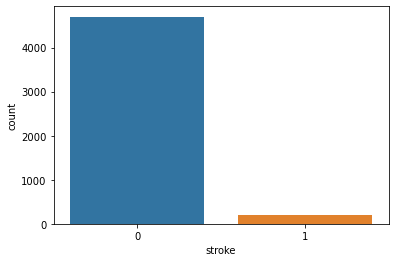

In [25]:
sns.countplot(csv["stroke"])

# Using the model

### Taking inputs for the model from the user

In [26]:
aGender = input("What gender are you? male/female ")

What gender are you? male/female male


In [27]:
aAge = int(input("How old are you? "))

How old are you? 16


In [28]:
aHypertension = input("Do you have hypertension? yes/no ")

Do you have hypertension? yes/no no


In [29]:
aHeart_disease = input("Do you have a heart disease? yes/no ")

Do you have a heart disease? yes/no no


In [30]:
aMarried = input("Have you ever been married? yes/no ")

Have you ever been married? yes/no no


In [31]:
aWork_type = input("What work type have you been in: private, selfemployed, children, govtjob, neverworked? ")

What work type have you been in: private, selfemployed, children, govtjob, neverworked? private


In [32]:
aResidence_type = input("Where do you live? urban/ rural")

Where do you live? urban/ ruralurban


In [33]:
aAvg_glucose_level = float(input("What is the average glucose level in your blood? "))

What is the average glucose level in your blood? 140


In [34]:
aBmi = float(input("What is your bmi?"))

What is your bmi?22.1


In [35]:
aSmoke = input("Do you smoke? formerly, never, yes")

Do you smoke? formerly, never, yesnever


### Cleaning user input

In [36]:
# Turning gender into int
if aGender.lower() == "male":
    aGender = 1
elif aGender.lower() == "female":
    aGender = 0 

In [37]:
# function to turn yes and no into 1 and 0
def inpToBool(inp):
    out = -1
    if inp.lower() == "yes":
        out = 1
    elif inp.lower() == "no":
        out = 0
    return out

In [38]:
aHypertension = inpToBool(aHypertension)
aHeart_disease = inpToBool(aHeart_disease)
aMarried = inpToBool(aMarried)


In [39]:
# Work type to int
if aWork_type == "private":
    aWork_type = 2
elif aWork_type == "selfemployed":
    aWork_type = 3
elif aWork_type == "children":
    aWork_type = 4
elif aWork_type == "govtjob":
    aWork_type = 0
elif aWork_type == "neveerworked":
    aWork_type = 1

In [40]:
# Residance into int
if aResidence_type == "urban":
    aResidence_type = 1
elif aResidence_type == "rural":
    aResidence_type = 0

In [41]:
# converting smoke into int
if aSmoke == "formerly":
    aSmoke = 1
elif aSmoke == "never":
    aSmoke = 2
elif aSmoke == "yes":
    aSmoke = 3

### Applying data to model

In [42]:
Xnew = [[aGender,aAge,aHypertension,aHeart_disease,aMarried,aWork_type,aResidence_type,aAvg_glucose_level,aBmi,aSmoke]]
Xnew = sc.transform(Xnew)
ynew = mlp.predict(Xnew)
if ynew[0] == 0:
    print("You have a low risk of stroke based on previous data")
else:
    print("You might have a higher risk of stroke")


You have a low risk of stroke based on previous data
